In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
with open('search_latencies.json') as f:
    data = json.load(f)

In [3]:
prompt_keys = [
    "How_does_incremental_hydration_help_improve_system_performance",
    "Preventing_cross-site_scripting",
    "How_to_use_Angular_Dependency_Injection",
    "being_reactive_with_resources",
    "explain_the_benefits_of_server-side_and_hybrid_rendering"
]

models = [
    "all-MiniLM-L6-v2",
    "paraphrase-MiniLM-L6-v2",
    "all-distilroberta-v1",
    "nomic-embed-text-v2",
    "summary-all-MiniLM-L6-v2",
    "summary-paraphrase-MiniLM-L6-v2",
    "summary-all-distilroberta-v1",
    "summary-nomic-embed-text-v2"
]

    - Generate per prompt latencies
    - Avg time for each prompt
    - Bar chart of avg time for each model

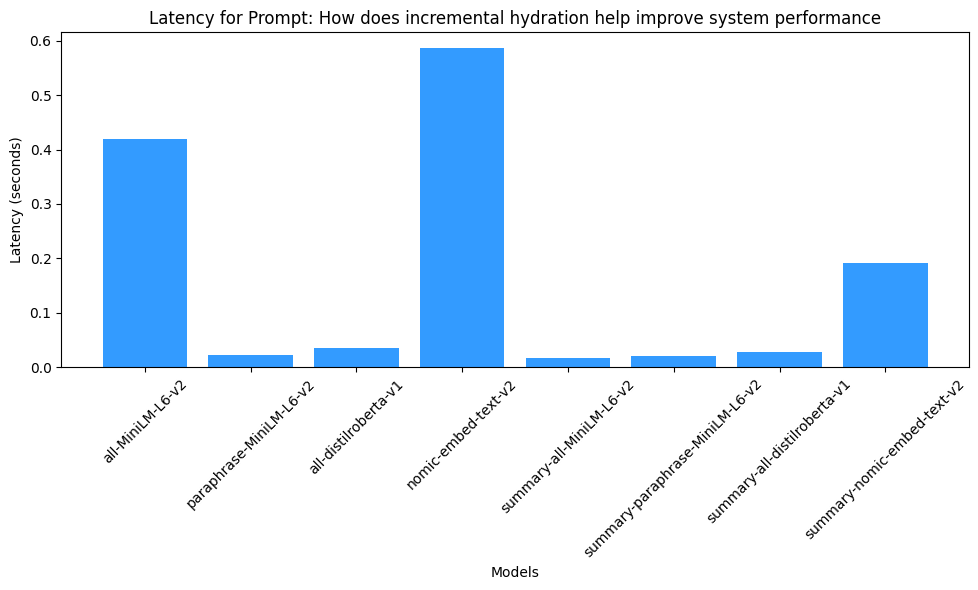

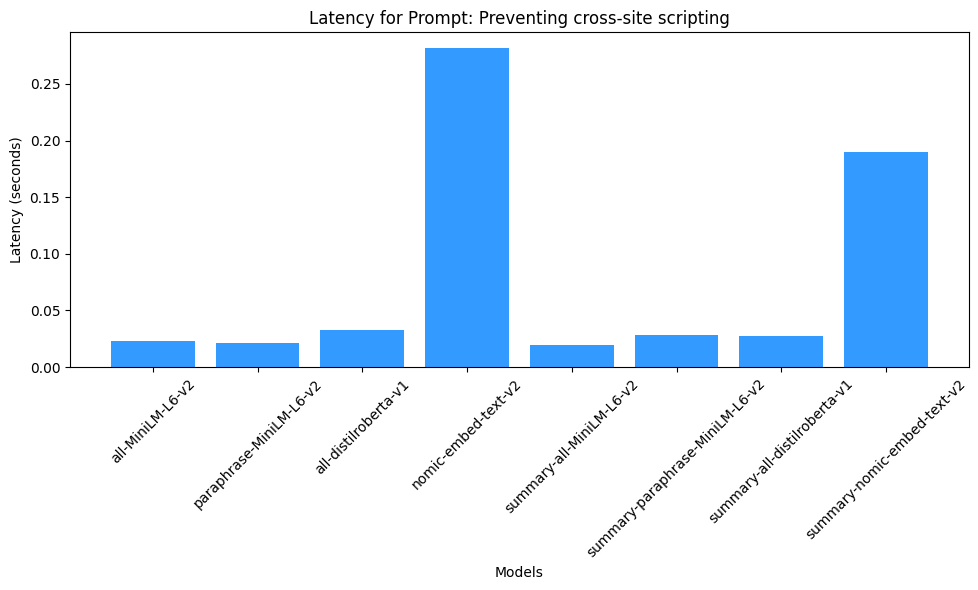

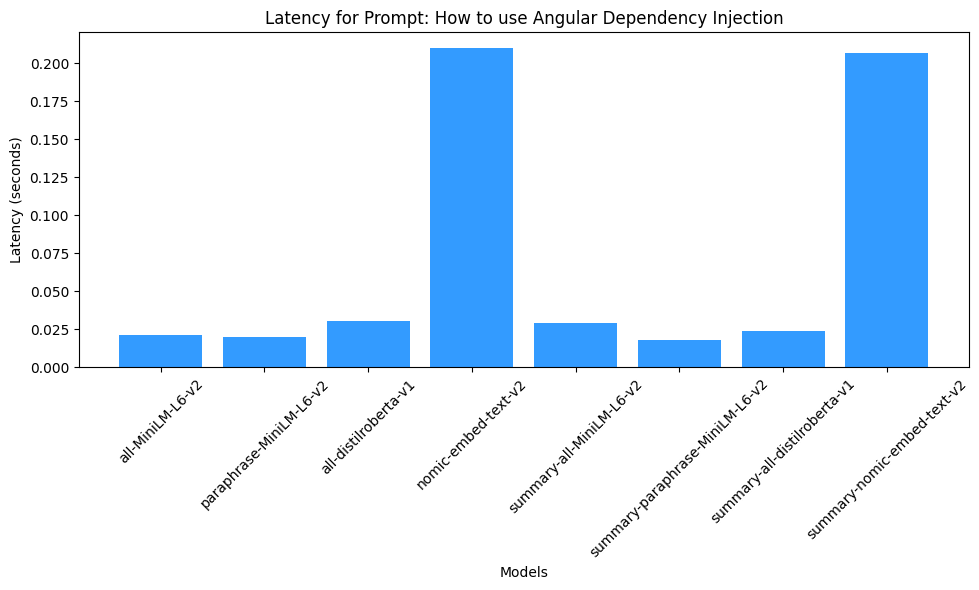

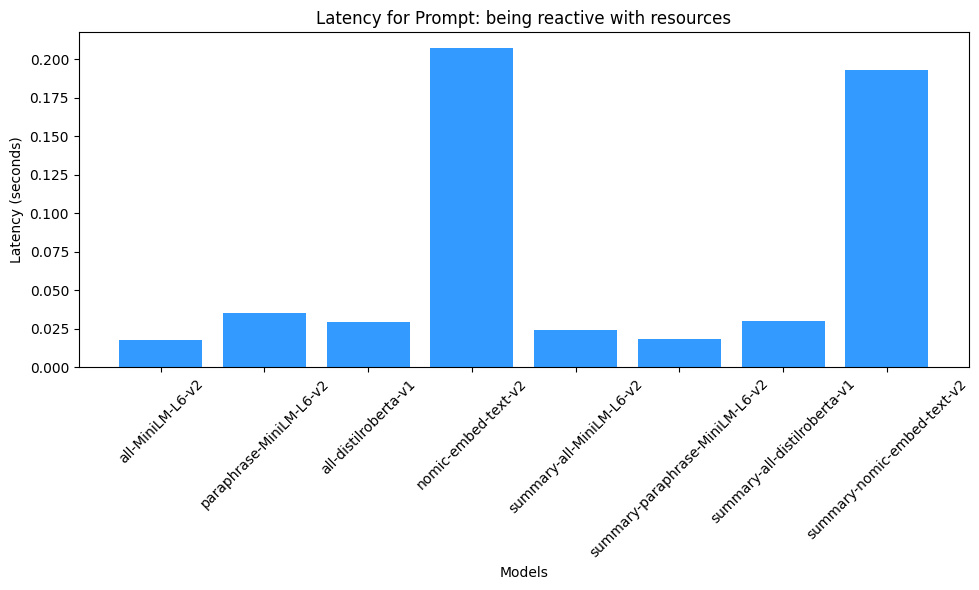

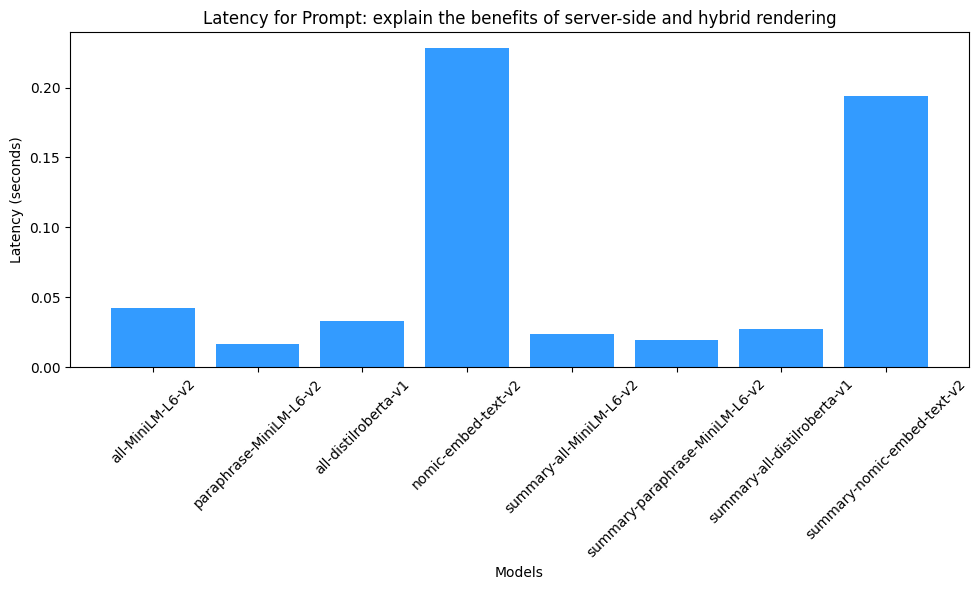

In [4]:
# Generate Bart Chart per
for prompt_key in prompt_keys:
    latencies = []

    for model in models:
        latencies.append(data[f"{prompt_key}-{model}"]["total_time"])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(models, latencies, color='#339bff')
    plt.xlabel('Models')
    plt.ylabel('Latency (seconds)')

    plt.title(f'Latency for Prompt: {prompt_key.replace("_", " ")}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"charts/per-prompt/latency_{prompt_key}.png")

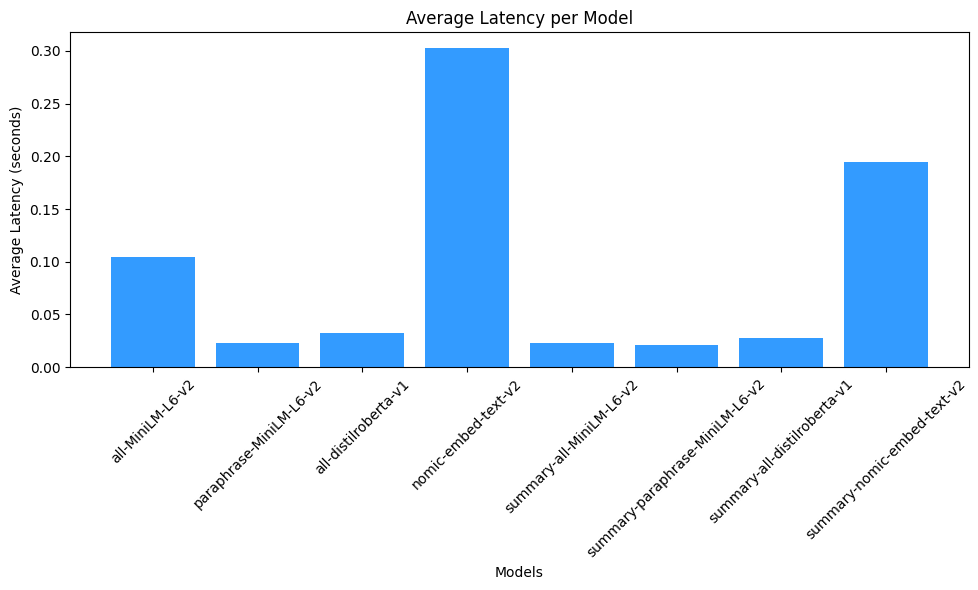

In [6]:
# Extract the latencies for each model and prompt
latency_data = {model: [] for model in models}
for prompt_key in prompt_keys:
    for model in models:
        latency_data[model].append(data[f"{prompt_key}-{model}"]["total_time"])

# Calculate the average latency for each model
average_latencies = {model: sum(latencies) / len(latencies) for model, latencies in latency_data.items()}

# Plotting the average latencies
plt.figure(figsize=(10, 6))
plt.bar(average_latencies.keys(), average_latencies.values(), color='#339bff')
plt.xlabel('Models')
plt.ylabel('Average Latency (seconds)')
plt.title('Average Latency per Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("charts/average_latency_per_model.png")

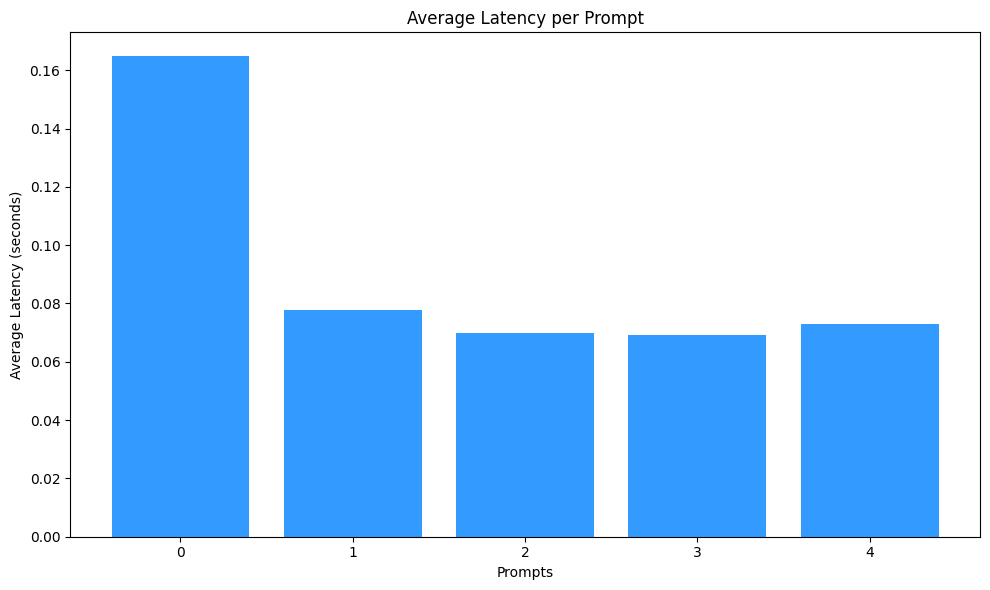

In [10]:
# Extract the latencies for each prompt and plot by index
latency_data = {prompt_key: [] for prompt_key in prompt_keys}
for prompt_key in prompt_keys:
    for model in models:
        latency_data[prompt_key].append(data[f"{prompt_key}-{model}"]["total_time"])

# Calculate the average latency for each prompt
average_latencies = {prompt_key: sum(latencies) / len(latencies) for prompt_key, latencies in latency_data.items()}
# Plotting the average latencies
plt.figure(figsize=(10, 6))
labels = [i for i in range(len(prompt_keys))]
plt.bar(labels, average_latencies.values(), color='#339bff')
plt.xlabel('Prompts')
plt.ylabel('Average Latency (seconds)')
plt.title('Average Latency per Prompt')
plt.tight_layout()
plt.savefig("charts/average_latency_per_prompt.png")